## Download the checkpoint files
Manual: download the [checkpoint files](https://storage.googleapis.com/cloud-tpu-checkpoints/detection/projects/fashionpedia/fashionpedia-spinenet-143.tar.gz), unzip to `lib/detection/checkpoint/`. 

In [1]:
!curl https://storage.googleapis.com/cloud-tpu-checkpoints/detection/projects/fashionpedia/fashionpedia-spinenet-143.tar.gz -o lib/detection/checkpoint/fashionpedia-spinenet-143.tar.gz
!unzip lib/detection/checkpoint/fashionpedia-spinenet-143.tar.gz d lib/detection/checkpoint
!rm lib/detection/checkpoint/fashionpedia-spinenet-143.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0Warning: Failed to open the file 

  0  567M    0  1678    0     0   2830      0 58:24:34 --:--:-- 58:24:34  2839
curl: (23) Failure writing output to destination


## Evaluation
Place the images in `eval/input`

In [79]:
%cd lib/detection

!python inference.py

%cd ../..

c:\CSE\SVDL\DLCV-project-33\lib\detection
 - Loading the label map...
 - Loading the checkpoint...
 - Processing image 0...
 - Processing image 1...
 - Saving the outputs...
c:\CSE\SVDL\DLCV-project-33


c:\CSE\SVDL\DLCV-project-33\lib\detection\modeling\architecture\nn_ops.py:378: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  return tf.layers.conv2d(
c:\CSE\SVDL\DLCV-project-33\lib\detection\modeling\architecture\spinenet.py:347: UserWarning: `tf.layers.max_pooling2d` is deprecated and will be removed in a future version. Please use `tf.keras.layers.MaxPooling2D` instead.
  net = tf.layers.max_pooling2d(
I0616 13:56:37.054361 26412 nn_blocks.py:135] -----> Building bottleneck block.
I0616 13:56:37.196671 26412 nn_blocks.py:135] -----> Building bottleneck block.
I0616 13:56:37.470676 26412 nn_blocks.py:135] -----> Building bottleneck block.
I0616 13:56:37.808672 26412 nn_blocks.py:135] -----> Building bottleneck block.
I0616 13:56:38.077673 26412 nn_blocks.py:135] -----> Building bottleneck block.
I0616 13:56:38.403671 26412 nn_blocks.py:135] -----> Building bottleneck block.
I0616 13:56:38.991768 2

In [ ]:
from IPython.display import HTML
HTML(filename='eval/output/res.html')

In [80]:
import numpy as np

res = np.load('eval/output/res.npy', allow_pickle=True)

In [81]:
import csv

CLASSES = {}
with open('lib/detection/projects/fashionpedia/dataset/fashionpedia_label_map.csv') as csv_file:
    for row in csv.reader(csv_file, delimiter=':'):
        id_index, name = row
        CLASSES[int(id_index)] = name

In [82]:
import json

with open('eval/attributes.json') as f:
    ATTRIBUTES = json.load(f)

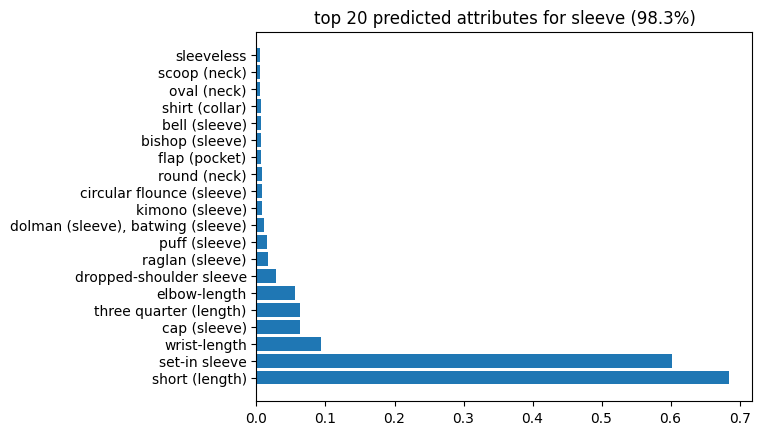

eval\input\10000.png


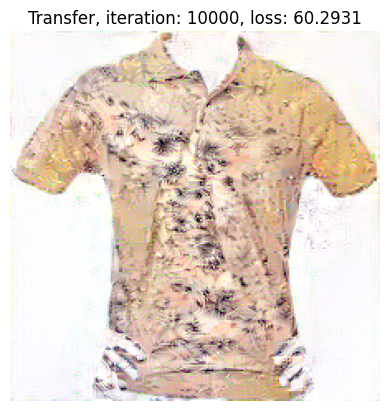

In [83]:
import matplotlib.pyplot as plt
from IPython.display import Image

subject, item, topn = 1, 1, 20

pred_class = CLASSES[res[subject]['classes'][item]]
class_score = res[subject]['scores'][item]

pred_scores = {att: score for att, score in zip(ATTRIBUTES, res[subject]['attributes'][item])}
pred_sorted = sorted(pred_scores.items(), key=lambda x: x[1], reverse=True)[:topn]

labels, scores = zip(*pred_sorted)

plt.barh(labels, scores)
plt.title(f'top {topn} predicted attributes for {pred_class} ({round(class_score*100,1)}%)')
plt.show()

#Windows
filename = res[subject]['image_file'].removeprefix('..\..\\')
#Mac
# filename = res[subject]['image_file'].removeprefix('../../')
print(filename)
Image(filename=filename, retina=True)

## Get scores

In [85]:
target_class = 'top, t-shirt, sweatshirt'
target_class_i = list(CLASSES.keys())[list(CLASSES.values()).index(target_class)]

for item in res:
    scores = [s for i, s in enumerate(item['scores']) if item['classes'][i] == target_class_i]

    score = max(scores) if scores else 0
    print(item['image_file'], score)

..\..\eval\input\0.png 0.99846953
..\..\eval\input\10000.png 0.12020547


In [86]:
attribute = ATTRIBUTES.index('floral')

for item in res:
    scores = [att_item[attribute] for att_item in item['attributes']]

    score = max(scores) if scores else 0
    print(item['image_file'], score)

..\..\eval\input\0.png 0.033015147
..\..\eval\input\10000.png 0.093172744


In [ ]:
#97-98
{
    "c-0.png": 0.95857185,
    "c-1000.png": 0, #GENERATED
    "a-1000.png": 0.18147044, #GENERATED
    "a-style.png": 0.0999045 
}
#97-250
{
    "c-0.png": 0.96076894,
    "c-1000.png": 0, #GENERATED
    "a-1000.png": 0.0047096754, #GENERATED
    "a-style.png": 0.0040980354
}
#97-321
{
    "c-0.png": 0.96495605,
    "c-1000.png": 0, #GENERATED
    "a-1000.png": 0.037858926, #GENERATED
    "a-style.png": 0.021106435
}
#100-98
{
    "c-0.png": 0.9945815,
    "c-1000.png": 0.98850083, #GENERATED
    "a-1000.png": 0.027190842, #GENERATED
    "a-style.png": 0.0999045
}
#944-98
{
    "c-0.png": 0.99846953,
    "c-1000.png": 0.12020547, #GENERATED
    "a-1000.png": 0.093172744, #GENERATED
    "a-style.png": None
}

print(round((0.07877914 - 0.18147044)**2 * 1/2 + (0.95857185)**2 * 1/2, 4))

In [ ]:
print(round((0.03814033791422844 - 0.11052097)**2 * 1/2 + (0.9687815)**2 * 1/2, 4))
print(round((0.06383903650566936 -  0.11052097)**2 * 1/2 + (0.9687815)**2 * 1/2, 4))
print(round((0.028179332613945007 - 0.11052097)**2 * 1/2 + (0.9687815)**2 * 1/2, 4))
print(round((0.06894254125654697 - 0.11052097)**2 * 1/2 + (0.9687815)**2 * 1/2, 4))
print(round((0 - 0.11052097)**2 * 1/2 + (0.9687815)**2 * 1/2, 4))
print(round((0 - 0.11052097)**2 * 1/2 + (0.9687815)**2 * 1/2, 4))
print(round((0 - 0.11052097)**2 * 1/2 + (0.9687815)**2 * 1/2, 4))
print(round((0.0805100854486227 - 0.11052097)**2 * 1/2 + (0.9687815)**2 * 1/2, 4))
print(round((0.10688413120806217 - 0.11052097)**2 * 1/2 + (0.9687815 - 0.14498885)**2 * 1/2, 4))
print(round((0.0718647874891758 - 0.11052097)**2 * 1/2 + (0.9687815)**2 * 1/2, 4))
print(round((0.028009441681206226 - 0.11052097)**2 * 1/2 + (0.9687815)**2 * 1/2, 4))
print(round((0 - 0.11052097)**2 * 1/2 + (0.9687815)**2 * 1/2, 4))